# 题目汇总

[7] 重建二叉树

[8] 二叉树下一个节点

[26] 树的子结构

[27] 二叉树的镜像

[28] 对称的二叉树

[32] 从上到下打印二叉树

[33] 二叉搜索树的后序遍历序列

[34] 二叉树中和为某一值得路径

[36] 二叉搜索树与双向链表

[37] 序列化二叉树

[54] 二叉搜索树第k大节点

[55] 二叉树的深度

# [7]重建二叉树 

1、题目：输入某二叉树的前序遍历和中序遍历的结果，请重建出该二叉树。假设输入的前序遍历和中序遍历的结果中都不含重复的数字。

例如输入前序遍历序列{1,2,4,7,3,5,6,8}和中序遍历序列{4,7,2,1,5,3,8,6}，则重建二叉树并返回。

In [13]:
# -*- coding:utf-8 -*-
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    # 返回构造的TreeNode根节点
    def reConstructBinaryTree(self, pre, tin):
        
        if not pre or not tin:
            return None
        idx = tin.index(pre.pop(0))
        root = TreeNode(tin[idx])
        root.left = reConstructBinaryTree(pre, tin[:idx])
        root.right = reConstructBinaryTree(pre, tin[idx+1:])
        return root       

# [8] 二叉树下一个节点

给定一棵二叉树和其中的一个节点，如何找出中序遍历序列的下一个节点？

特别注意：

树中的节点除了有两个分别指向左右节点的指针，还有一个指向父节点的指针。


## 思路

分析二叉树的下一个节点，一共有以下情况：

1、二叉树为空，则返回空；

2、节点右孩子存在，则设置一个指针从该节点的右孩子出发，一直沿着指向左子结点的指针找到的叶子节点即为下一个节点；

3、节点不是根节点。如果该节点是其父节点的左孩子，则返回父节点；如果是右节点继续向上遍历其父节点的父节点，重复之前的判断，返回结果。


In [17]:
# class TreeLinkNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None
#         self.next = None #指向父节点

class Solution:
    def GetNext(self, pNode):
    
        if not pNode:
            return None
        if pNode.right:
            pNode = pNode.right
            while pNode.left:
                pNode = pNode.left
            return pNode
        else:
            while pNode.next:
                if pNode == pNode.next.left:
                    return pNode.next
                pNode = pNode.next
        return None
        

# [26] 树的子结构

题目：输入两棵树A和B， 判断B是不是A的子结构。

In [14]:
# -*- coding:utf-8 -*-
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def HasSubtree(self, pRoot1, pRoot2):
        # write code here
        result = False
        
        if pRoot1 != None and pRoot2 != None:
            if pRoot1.val == pRoot2.val:
                result = self.same(pRoot1, pRoot2)
            if not result:
                result = self.HasSubtree(pRoot1.left, pRoot2)
            if not result:
                result = self.HasSubtree(pRoot1.right, pRoot2)
            return result 
        

    def same(self, pRoot1, pRoot2):
        if pRoot2 == None:
            return True
        if pRoot1 == None:
            return False
        # 这一步不断判断下一个节点，因为是递归操作。
        if pRoot1.val != pRoot2.val:
            return False
        return self.same(pRoot1.left, pRoot2.left) and self.same(pRoot1.right, pRoot2.right)

# [27] 二叉树的镜像

左右子树对换

In [15]:
def Mirror(root):
    if root == None:
        return
    if root.left == None and root.right == None:
        return root

    pTemp = root.left
    root.left = root.right
    root.right = pTemp
    
    if root.left:
        Mirror(root.left)
    if root.right:
        Mirror(root.right)


# [28] 对称二叉树

In [18]:
def isSame(p1,p2):
    if not p1 and not p2:
        return True
    if not p1 or not p2:
        return False
    if p1.val != p2.val:
        return False
    return isSame(p1.left, p2.right) and isSame(p1.right, p2.left)

def isSymmetrical(self, pRoot):
    # write code here
    if not pRoot:
        return True
    return isSame(pRoot.left, pRoot.right)


# [32] 从上到下打印二叉树

In [19]:
def TopToBottom(root):
    if not root:
        return 
    res = []
    queue = []
    queue.append(root)
    while queue:
        node = queue.pop(0)
        res.append(node.val)
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
        
    return res

# 扩展：之形打印二叉树

当前层、下一层、度数

当度数为偶数时，逆序打印，反之正序打印。

In [21]:
def print(root):
    
    if not root:
        return []
    res = []
    cur = [root]
    isEven = True
    while cur:
        curLayer = []
        nextLayer = []
        isEven = not isEven
        for node in cur:
            curLayer.append(node.val)
            if node.left:
                nextLayer.append(node.left)
            if node.right:
                nextLayer.append(node.right)
        cur = nextLayer
        res.append(curLayer[::-1] if isEven else result.append(curLayer))
    return res
        
    

# 面试题33：二叉搜索树的后序遍历序列

In [12]:
class Solution:
    def VerifySquenceOfBST(self, sequence):
        # write code here
        if not sequence:
            return False

        root = sequence[-1]

        i = 0
        for node in sequence[:-1]:
            if node > root:
                break
            i += 1

        for node in sequence[i:-1]:
            if node < root:
                return False

        left = True
        # i>0 意味i =0 或者1 的时候，两个元素在二叉树没有排序之分的，但是3个元素就有了左右子树之分
        if i > 0:
            left = self.VerifySquenceOfBST(sequence[:i])

        right = True
        # len(sequence)>3才有左右之分的
        if i < len(sequence) - 2 and left:
            right = self.VerifySquenceOfBST(sequence[i:-1])

        return left and right

    
if __name__=='__main__':
    seq = [5,7,6,9,11,10,8]
    s = Solution()
    result = s.VerifySquenceOfBST(seq)
    print(result)
    

True


# 面试题34：二叉树中和为某一值的路径

1、题目：输入一颗二叉树和一个整数，打印出二叉树中结点值的和为输入整数的所有路径。**路径定义为从树的根结点开始往下一直到叶结点所经过的结点形成一条路径.**

In [26]:
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None
def FindPath2(root, path, currentNum):
    currentNum += root.val
    # root使用append转成了列表，因为最后要一个序列，root本身还是树结构
    path.append(root)
    # 判断是不是到叶子节点了，到叶子节点了就要判断值的和是不是相等
    flag = (root.left == None and root.right == None)
    # 返回值是一个等于整数的序列
    if currentNum == expectNumber and flag:
        onepath = []
        for node in path:
            onepath.append(node.val)
        result.append(onepath)

    if currentNum < expectNumber:
        if root.left:
            FindPath2(root.left, path, currentNum)
        if root.right:
            FindPath2(root.right, path, currentNum)
    # 拿到一个正确的路径后要弹出，回到上一次父节点继续递归
    path.pop()

    
# 返回二维列表，内部每个列表表示找到的路径
def FindPath(root, expectNumber):
    # write code here
    if not root:
        return []
    result = []
    FindPath2(root, [], 0)
    return result

# [36] 二叉搜索树与双向链表

要求: 将二叉搜索树转化成一个排序的双向链表，只调整树中结点的指向

思路: 中序遍历，根结点的left指向左子树的最后一个(最大)值，right指向右子树的(最小)值

In [23]:
class Solution(object):

    @staticmethod
    def convert(tree):
        """结点转换"""
        if not tree:
            return None
        p_last = Solution.convert_nodes(tree, None)
        while p_last and p_last.left:  # 获取链表头结点
            p_last = p_last.left
        return p_last

    @staticmethod
    def convert_nodes(tree, last):
        if not tree:
            return None
        if tree.left:
            last = Solution.convert_nodes(tree.left, last)
        if last:
            last.right = tree
        tree.left = last
        last = tree
        if tree.right:
            last = Solution.convert_nodes(tree.right, last)
        return last


# [37] 序列化二叉树 

实现两个函数，分别用来序列化和反序列化二叉树。

1、序列化二叉树：

把一棵二叉树按照某种遍历方式的结果以某种格式保存为字符串。需

要注意的是，序列化二叉树的过程中，如果遇到空节点，需要以某种符号（这里用#）表示。

以下图二叉树为例，序列化二叉树时，需要将空节点也存入字符串中。

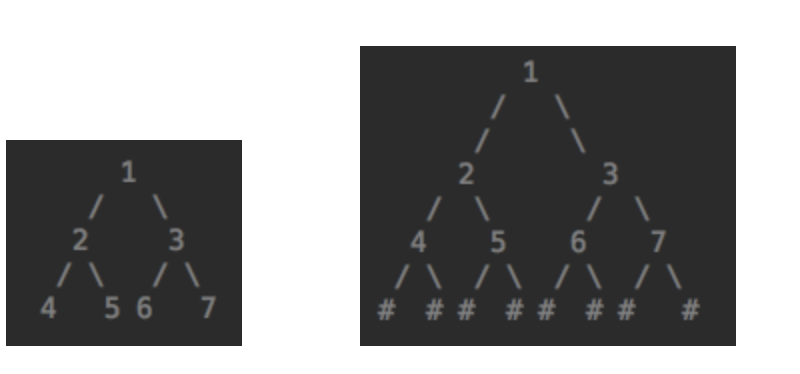

2、反序列化二叉树：

根据某种遍历顺序得到的序列化字符串，重构二叉树。

具体思路是按前序遍历“根左右”的顺序，根节点位于其左右子节点的前面，即非空（#）的第一个节点是某子树的根节点，左右子节点在该根节点后，以空节点#为分隔符



In [25]:
# 前序遍历，空节点用”#“表示
def Serialize(root):
    if not root:
        return '#'
    return str(root.val) + ',' + Serialize(root.left) + ',' + Serialize(root.right)


def deserializeTree(res):
    if len(res)<=0:
        return None
    val = res.pop(0)
    root = None
    if val != '#':
        root = TreeNode(int(val))
        root.left = deserializeTree(res)
        root.right = deserializeTree(res)
    return root


def Deserialize(s):
    res = s.split(',')
    return deserializeTree(res)


# [54] 二叉搜索树第k大节点


先中序遍历，用列表存储中序遍历结果，然后找到第K大的节点


In [ ]:
def KthNodeCore(pRoot):
    
    if not pRoot:
        return []
    res = []
    if pRoot.left:
        res.extend(KthNodeCore(pRoot.left))
    res.append(pRoot)
    if pRoot.right:
        res.extend(KthNodeCore(pRoot.right))
    return res
        

def KthNode(pRoot, k):
    # write code here
    if pRoot is None or k==0:
        return
    result =  KthNodeCore(pRoot)
    if len(result)<k:
        return None
    return result[k-1]


## 面试题55：二叉树的深度

In [22]:
class Solution(object):
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """
        if not root: #递归边界
            return 0
        else:
            l=1+self.maxDepth(root.left) #递归
            r=1+self.maxDepth(root.right)
            return max(l,r)

        

In [44]:
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None
class Solution:
    def TreeDepth(self, pRoot):
        # write code here
        if pRoot == None:
            return 0
        return max(self.TreeDepth(pRoot.left), self.TreeDepth(pRoot.right)) + 1
